# 📊 UrbanSound8K Dataset - Exploratory Data Analysis

This notebook provides an overview of the **UrbanSound8K** dataset.  
We explore the dataset structure, visualize class distributions, and listen to sample audio clips.  

In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import yaml

# Getting the values from config file
with open("../config.yaml","r") as file:
    config = yaml.safe_load(file)
    
# Dataset to analyze
dataset = "urbanSound8K"

# Important paths ;)
dir_path = config["paths"][dataset]
csv_path = dir_path + "/UrbanSound8K.csv"

In [2]:
# List out the dataset folder
os.listdir(dir_path)

['UrbanSound8K.csv',
 'fold2',
 'fold7',
 'fold5',
 'fold8',
 'fold6',
 'fold3',
 'fold10',
 'fold1',
 'fold4',
 'fold9']

In [3]:
# Load the csv file
df = pd.read_csv(csv_path)
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [4]:
# Shape of the dataset
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} columns")

8732 rows
8 columns


In [5]:
# Getting data type information and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [6]:
# Random statistics ;)
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [7]:
# Classes info
classes = df["class"].unique()

print(f"{len(classes)} classes")
print(f"{classes}")

10 classes
['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


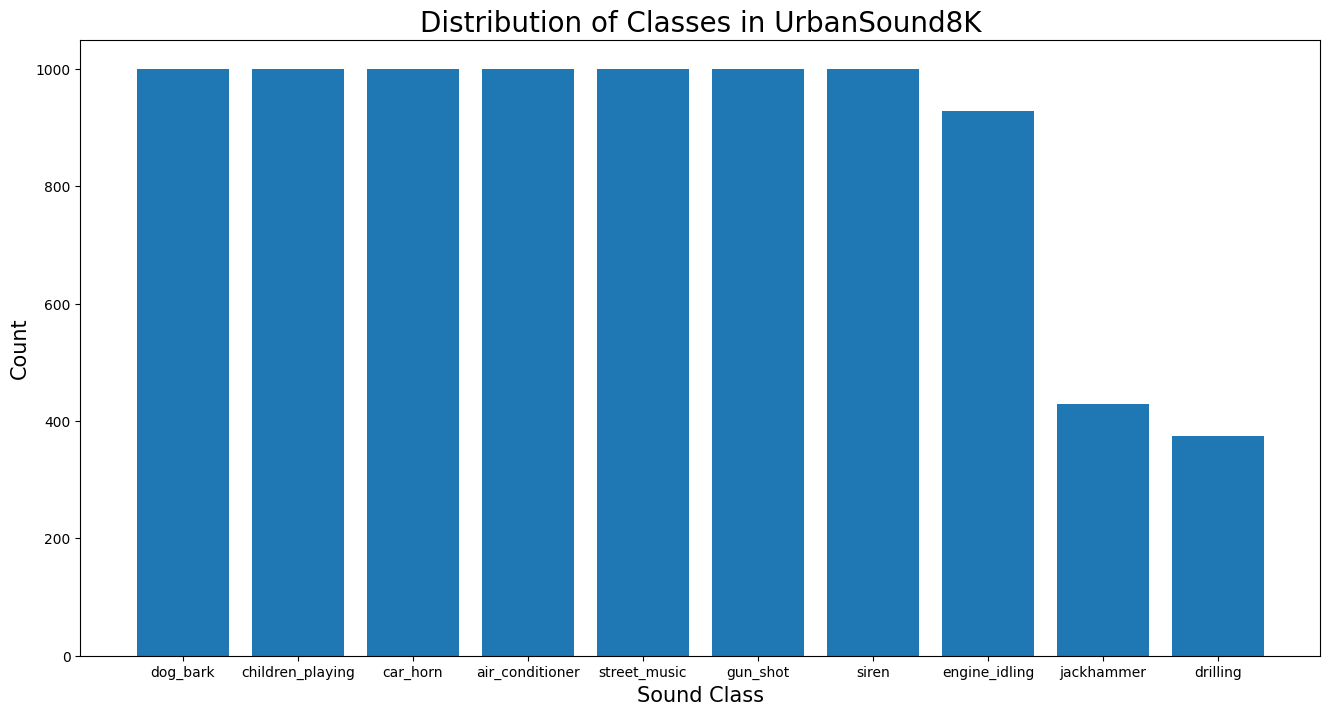

In [8]:
plt.figure(figsize=(16, 8))
plt.bar(classes, df["class"].value_counts().values)
plt.xlabel("Sound Class", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Classes in UrbanSound8K", fontsize = 20)
plt.show()

In [9]:
# Playing a random sound
randomRowNumber = np.random.randint(0,df.shape[0]+1)
randomRow = df.iloc[randomRowNumber]
audioFilePath = f"{dir_path}/fold{randomRow["fold"]}/{randomRow["slice_file_name"]}"

print(f"Class : {randomRow["class"]}")
Audio(audioFilePath)

Class : air_conditioner
